## 1. Load libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.classification import *

## 2. Read in data

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [4]:
df.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

With a quick groupby we notice a relation between condition distribution and the following features: sex, cp, restecg, thalach, exang, oldpeak, slope, ca and thal. We are going to explore further those relations. First we are going to plot a correlation matrix.

In [14]:
# Gropby and get the mean of each group
df.groupby('condition').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
condition,,,,,,,,,,,,,
0,52.643750,0.556250,1.793750,129.175000,243.493750,0.143750,0.843750,158.581250,0.143750,0.598750,0.412500,0.275000,0.375000
1,56.759124,0.817518,2.583942,134.635036,251.854015,0.145985,1.175182,139.109489,0.540146,1.589051,0.824818,1.145985,1.372263


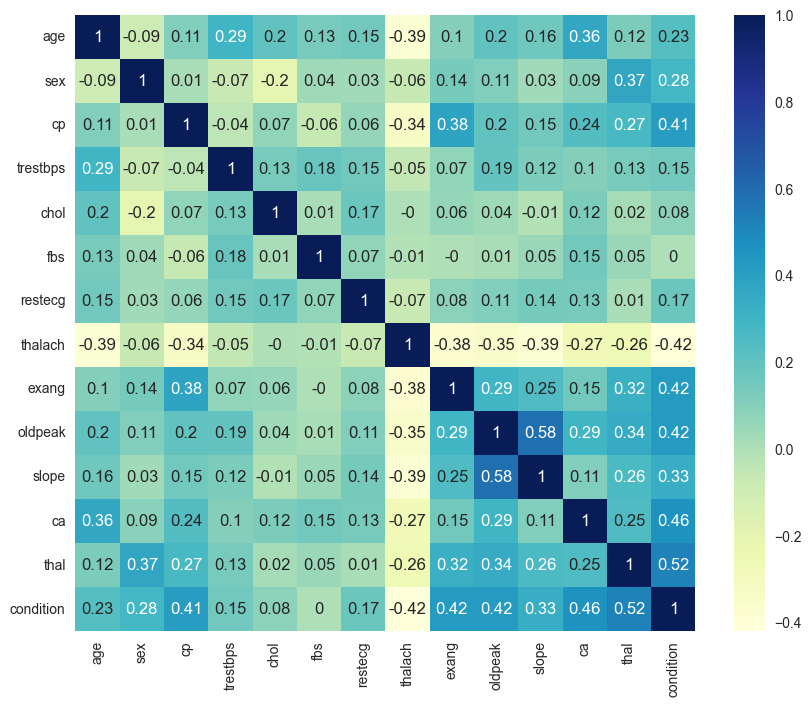

In [21]:
# Create heatmap
plt.figure(figsize=(10,8))
sns.heatmap(round(df.corr(), 2), annot=True, cmap="YlGnBu")
plt.show()

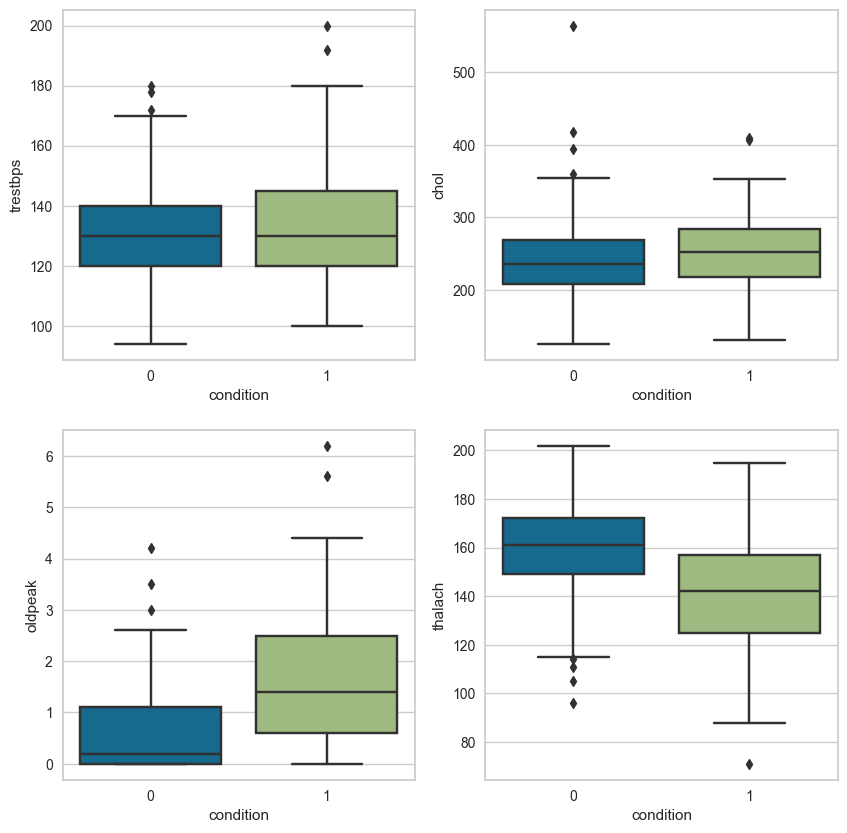

In [23]:
# Create box plots
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='condition', y='trestbps')
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='condition', y='chol')
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='condition', y='oldpeak')
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='condition', y='thalach')
plt.show()

## 3. Train and evaluate model

In [5]:
cat_features = ['sex','cp','fbs','restecg','exang','thal']

In [ ]:
setup??

In [6]:
experiment = setup(df,target ='condition',categorical_features=cat_features)

,Description,Value
0,Session id,2057
1,Target,condition
2,Target type,Binary
3,Original data shape,"(297, 14)"
4,Transformed data shape,"(297, 21)"
5,Transformed train set shape,"(207, 21)"
6,Transformed test set shape,"(90, 21)"
7,Ordinal features,3
8,Numeric features,7
9,Categorical features,6


In [7]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8400,0.8819,0.7978,0.8503,0.8197,0.6757,0.6804,0.7980
ridge,Ridge Classifier,0.8398,0.0000,0.7889,0.8419,0.8098,0.6733,0.6772,0.7270
lda,Linear Discriminant Analysis,0.8398,0.8986,0.7889,0.8419,0.8098,0.6733,0.6772,0.7640
lr,Logistic Regression,0.8393,0.9018,0.7767,0.8467,0.8016,0.6707,0.6775,1.2800
catboost,CatBoost Classifier,0.8160,0.8838,0.7678,0.8119,0.7837,0.6254,0.6299,1.6140
rf,Random Forest Classifier,0.8157,0.8908,0.7889,0.8024,0.7877,0.6263,0.6330,0.8360
et,Extra Trees Classifier,0.8062,0.8793,0.7767,0.7791,0.7707,0.6053,0.6087,0.9410
xgboost,Extreme Gradient Boosting,0.7969,0.8712,0.7678,0.7838,0.7671,0.5895,0.5975,0.8690
nb,Naive Bayes,0.7914,0.8786,0.6422,0.8581,0.7240,0.5695,0.5888,0.7080
lightgbm,Light Gradient Boosting Machine,0.7874,0.8809,0.7556,0.7707,0.7556,0.5691,0.5758,0.8450


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [10]:
predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.7556,0.8557,0.6667,0.7778,0.7179,0.5045,0.5092


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition,prediction_label,prediction_score
251,53,0,3,130,264,0,2,143,0,0.4,1,0,0,0,0,0.5266
15,52,1,0,118,186,0,2,190,0,0.0,1,0,1,0,0,0.5289
210,59,1,3,164,176,1,2,90,0,1.0,1,2,1,1,1,0.5260
263,50,1,3,150,243,0,2,128,0,2.6,1,0,2,1,1,0.5352
140,44,1,2,140,235,0,2,180,0,0.0,0,0,0,0,0,0.5331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,60,1,2,140,185,0,2,155,0,3.0,1,0,0,1,0,0.5118
11,59,1,0,160,273,0,2,125,0,0.0,0,0,0,1,1,0.5083
21,38,1,0,120,231,0,0,182,1,3.8,1,0,2,1,1,0.6574
179,63,1,3,130,254,0,2,147,0,1.4,1,1,2,1,1,0.5308


## 4. Test Model

In [11]:
predict_model(best_model, df.tail())

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition,prediction_label,prediction_score
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1,1,0.5077
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1,1,0.5130
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1,1,0.5263
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0,0,0.5324
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1,1,0.5284


## 5. Save Moldel

In [12]:
save_model(best_model, model_name = 'Ridge Classifier' )

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\gbullock\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'trestbps', 'chol',
                                              'thalach', 'oldpeak', 'slope',
                                              'ca'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose=0))),
                 ('categorical_imputer'...
                                     include=['cp', 'restecg', 'thal'],
                               